# Introduction to Machine Learning (CSCI-UA.473)

## Homework 6: Gaussian Mixture Models and the EM Algorithm

### Due: December 16th, 2021 at 11:59PM

### Name: Mindy Wu


### Email: mhw370

The goal of this assignment is to practice the Gaussian mixture models and the EM algorithm. 

Below are all of the packages you will need for this assignment.  `cv2` refers to the package OpenCV, which you may need to install.  This can be done with the command

`pip install opencv-python`

OpenCV is a package for computer vision, but here we will only use it to help display images.  You may also need the `pickle` package which can be installed with

`pip install pickle`

**Do not** alter the cell below or add any other packages.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import multivariate_normal as normal # Multivariate normal distribution
from scipy.stats import multinomial # Multinomial distribution
import cv2 # OpenCV package for computer vision

## Question P1. Gaussian mixture models and the EM algorithm (60 Points Total)

In this problem you will implement the EM algorithm to fit a Gaussian mixture model.  

### Question P1.a: Implementing a Gaussian mixture model (30 Points)
Recall that in a Gaussian mixture model there is a latent variable $z = i$ with probability $\phi_i$ for $i=1,\ldots,K$ so that ${\bf x}|z = i \sim \mathrm{Normal}(\mu_i,\ \Sigma_i)$ for $i=1,\ldots,K$.  Implement the GMM class by completing the following methods.
1. `fit` which simply optimizes over the parameters $\phi_i$, $\mu_i$, and $\Sigma_i$ using the EM algorithm.
2. `expectation_step` which computes the posterior probabilities 
$$
\gamma_{ik} = p(z = k| {\bf x}_i) = \frac{\phi_k N({\bf x}_i; \mu_k, \Sigma_k)}{\sum_{j=1}^K \phi_j N({\bf x}_i; \mu_j, \Sigma_j)}
$$
where $N({\bf x}_i; \mu_k, \Sigma_k)$ denotes the pdf of a multivariate normal distribution at the point ${\bf x}_i$ with mean $\mu_k$ and covariance $\Sigma_k$.
3. `maximization_step` which computes the updated values of the parameters $\phi,\mu,\Sigma$.

You are encouraged to use the `multivariate_normal` module.  For this part you do not need to implement the `sample` method, since this will be done later on.

In [40]:
# reference from this link
# https://towardsdatascience.com/gaussian-mixture-models-implemented-from-scratch-1857e40ea566

class GMM:
    
    """
    Initialize a Gaussian mixture model with K clusters.

    Input:
    K, int -- the number of clusters
    X, numpy.ndarray -- shape (N, d) where N is the number of data points and d is the dimension
    phi_0, numpy.ndarray -- shape (K, ) where K is number of clusters, initialization of probability vector phi
    mu_0, numpy.ndarray -- shape (K, d), initialization of the cluster means
    cov_0, numpy.ndarray -- shape (K, d, d), initialization of the cluster covariance
    """
    def __init__(self, K, X, phi_0, mu_0, cov_0):
        
        # Verify that everything is the correct dimensions.
        assert phi_0.shape[0] == K
        assert mu_0.shape[0] == K
        assert cov_0.shape[0] == K
        assert mu_0.shape[1] == X.shape[1]
        assert mu_0.shape[1] == cov_0.shape[1]
        assert cov_0.shape[1] == cov_0.shape[2]
        
        self.K = K # Number of clusters
        self.X = X # Dataset
        self.N = X.shape[0] # Number of data points
        self.d = X.shape[1] # Dimension of the data
        
        # Initialize the means and covariances of the components.
        self.phi = phi_0
        self.mu = mu_0
        self.cov = cov_0
    
    """
    Fit the parameters of the Gaussian mixture model using the EM algorithm.  Alternate between
    the expectation and maximization steps.  Note that the maximization_step function will 
    update the parameters, so this method will not return anything.
    
    Input:
    iters, int -- the number of iterations to perform
    """
    def fit(self, iters):
        ## TO DO STARTS HERE ##
        for i in range(iters):
          gamma = self.expectation_step()
          self.maximization_step(gamma)
        ## TO DO ENDS HERE ##
    
    """
    Perform the expectation step in the EM algorithm by computing the posterior
    probabilities gamma_{ik} = p(z = k| x_i) for i = 1,...,N and k = 0,...,K-1.
    
    Return:
    gamma, numpy.ndarray -- shape (N, K) of the posterior probabilities
    """
    def expectation_step(self):
        gamma = np.zeros((self.N, self.K))
        ## TO DO STARTS HERE ##
        for n in range(self.N):
          for k in range(self.K):
            gamma[n][k] = self.phi[k] * normal.pdf(X[n], mean = self.mu[k], cov = self.cov[k])
            gamma[n][k] /= sum([self.phi[j] * normal.pdf(X[n], mean = self.mu[j], cov = self.cov[j]) for j in range(self.K)])

        ## TO DO ENDS HERE ##     
        return gamma
    
    """
    Perform the maximization step in the EM algorithm by computing the updated phi, mu, and cov.
    
    Input:
    gamma, numpy.ndarray -- shape (N, K) of the posterior probabilities p(z = k|x_i)
    """
    def maximization_step(self, gamma):
        phi = np.zeros(self.K)
        mu = np.zeros((self.K, self.d))
        cov = np.zeros((self.K, self.d, self.d))
        ## TO DO STARTS HERE ##
        # initialize the mean vector as zero vector
        M = np.sum(gamma, axis = 0)
        # first, we update the mean vector 
        for k in range(self.K):
          for n in range(self.N):
            mu[k] += gamma[n][k] * self.X[n]

        mu = [(1/M[k]) * mu[k] for k in range(self.K)]

        #updating the covariance matrix
        for k in range(self.K):
          cov[k] = np.cov(X.T, aweights = (gamma[:, k]), ddof = 0)
        cov = [(1/M[k])* cov[k] for k in range(self.K)]

        # updating the phi list
        phi = [M[k]/ self.N for k in range(self.K)]
   
        ## TO DO ENDS HERE ##
        self.phi = phi
        self.mu = mu
        self.cov = cov
    
    """
    Draw n_samples from the mixture model p(x).  Assume that the parameters have already been fit.
    
    Input:
    n_samples, int -- the number of samples from p(x) to draw

    Return:
    X_sampled, numpy.ndarray -- shape (n_samples, d) samples
    """
    def sample(self, n_samples):
        X_sampled = np.zeros((n_samples, self.d))
        ## ONLY FOR PART C.
        ## TO DO STARTS HERE ##

        #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html
        # rvs: Draw random samples from a multinomial distribution.
        num_per_cluster = multinomial.rvs(n_samples, self.phi, size = 1, random_state=None).flatten()
        k = 0 
        j = 0
        for num in range (len(num_per_cluster)):
          sampled_length = num_per_cluster[num]
          X_sampled[k:k+sampled_length, :] = normal.rvs(self.mu[j], self.cov[j], sampled_length)
          # update the k and j
          k += sampled_length
          j += 1


        ## TO DO ENDS HERE ##
        return X_sampled

### Question P1.b: Toy dataset and comparison with K-means (20 Points)

You will now test your GMM and EM implemention on the 2-dimensional toy dataset below with 2 components for the mixture model (i.e. $K = 2$).  In particular, we assume that the true parameters of the mixture model are
$$
\phi = (0.5,\ 0.5),\quad \mu_0 = \begin{bmatrix} 0\\0 \end{bmatrix},\quad \mu_1 = \begin{bmatrix}10\\0\end{bmatrix}
$$
and
$$
\Sigma_0 = \Sigma_1 = \begin{bmatrix}
1 & 0\\
0 & 10^4
\end{bmatrix}
$$

X has shape  (50, 2)


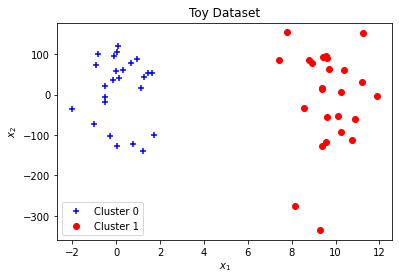

In [41]:
K = 2 # Number of clusters

X_0 = normal.rvs(size = 25, mean = np.zeros(2), cov = np.array([[1, 0], [0, 1e4]])) # Points from the first cluster.
X_1 = normal.rvs(size = 25, mean = np.array([10, 0]), cov = np.array([[1, 0], [0, 1e4]])) # Points from the second cluster.
X = np.vstack([X_0, X_1])
print("X has shape ", X.shape)

plt.scatter(X_0[:,0], X_0[:,1], c = 'b', marker = '+', label = 'Cluster 0')
plt.scatter(X_1[:,0], X_1[:,1], c = 'r', marker = 'o', label = 'Cluster 1')
plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Toy Dataset')
plt.show()

Your task is the following.

1.  Fit both a Gaussian mixture model and K-means, each with $K = 2$ clusters, using the initial parameters provided below and 50 iterations each.
2.  Since GMM gives a "soft-clustering" we can assign cluster labels based on which cluster has the highest posterior probability $p(z = k|{\bf x}_i)$.  In other words, assign the point ${\bf x}_i$ to cluster $k$ if
$$
p(z = k|{\bf x}_i) = \mathrm{max}_{j \in \{0,\ldots,K-1\}}p(z = j|{\bf x}_i)
$$
Let ${\bf y} \in \{0,1\}^N$ denote the results of the clustering.  In other words, ${\bf y}_i = 1$ if ${\bf x}_i$ is assigned to cluster 1 and 0 if it is assigned to cluster 0.  Compute the cluster assignments for both GMM and K-means.  Explain in words why you obtain the clusterings you do using the different methods.

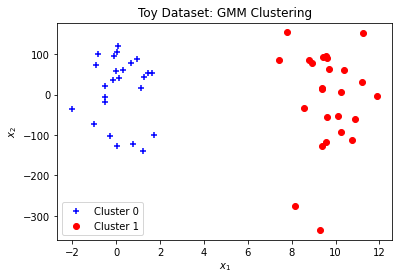

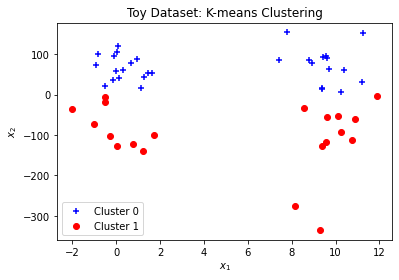

In [42]:
# The initial conditions for the first model.  The true parameters for the model.
phi_0 = np.array([0.5, 0.5])
mu_0 = np.array([[0, 0], [10, 0]])
cov_0 = np.array([[[1, 0], [0, 1e4]], [[1, 0], [0, 1e4]]])


y_1 = None # The GMM cluster assignments np.ndarray(N,)
y_2 = None # The k-means cluster assignments np.ndarray(N,)


## TO DO STARTS HERE ##

model_gmm = GMM(K = K, X =X, phi_0 = phi_0, mu_0 = mu_0, cov_0 = cov_0)
model_gmm.fit(50)


# the GMM model
y_1 = np.zeros((model_gmm.X.shape[0], model_gmm.K))

for k in range(model_gmm.K):
  y_1[:,k] = (model_gmm.phi[k]* normal.pdf(model_gmm.X, model_gmm.mu[k], model_gmm.cov[k]))

y_1 = y_1.argmax(1)

# the k-means cluster
y_2 = np.zeros((model_gmm.X.shape[0], model_gmm.K))

for k in range(model_gmm.K):
  d = model_gmm.mu[k] - model_gmm.X
  y_2[:, k] = np.sqrt(np.sum(d **2, axis = -1))

y_2 = y_2.argmin(1)

## TO DO ENDS HERE ##


plt.figure()
plt.scatter(X[y_1 == 0,0], X[y_1 == 0,1], c = 'b', marker = '+', label = 'Cluster 0')
plt.scatter(X[y_1 == 1,0], X[y_1 == 1,1], c = 'r', marker = 'o', label = 'Cluster 1')
plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Toy Dataset: GMM Clustering')
plt.show()


plt.figure()
plt.scatter(X[y_2 == 0,0], X[y_2 == 0,1], c = 'b', marker = '+', label = 'Cluster 0')
plt.scatter(X[y_2 == 1,0], X[y_2 == 1,1], c = 'r', marker = 'o', label = 'Cluster 1')
plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Toy Dataset: K-means Clustering')
plt.show()


While both k-means and GMM update and consider means into their model for the next iteration, you can tell from the graph that GMM has clearer separation of clusters because it also consider the variance while iterating. From the GMM model method above, you can see "model_gmm.cov[k]" is included for the y_1, so the model for GMM is more robust, thus, the result.


### Question P1.c: Sampling from a Gaussian mixture model (10 Points)

Because a Gaussian mixture model describes a probability distribution over the features ${\bf x}$, we can use it to sample new features and greatly increase the total number of samples we have.

1. Finish the implementation of the `GMM` class by completing the `sample` method, which draws many samples from $p(x)$.  It is recommended to use both the `multivariate_normal` and `multinomial` modules that were loaded earlier.
2. Draw 1000 samples from the Gaussian mixture model you learned in the previous part.  Assign each of the newly sampled points to a cluster depending on their posterior probabilities $p(z = k|{\bf x}_i)$.

In [43]:
X_sampled = None # The newly sampled data.
y = None # The vector of cluster assignment labels.

## TO DO STARTS HERE ##
X_sampled = model_gmm.sample(100)
gammas = np.zeros((1000, 2))

for n in range(1000):
  for k in range(2):
    gammas[n][k] = model_gmm.phi[k] * normal.pdf(X_sampled[n], mean = model_gmm.mu[k], cov = model_gmm.cov[k])
    gammas[n][k] /= sum([model_gmm.phi[j] * normal.pdf(X_sampled[n], mean = model_gmm.mu[j],cov = model_gmm.cov[j]) for j in range(model_gmm.K)])
                                                                                                                                                 
    
y = np.argmax(gammas, axis = 1)

## TO DO ENDS HERE ##

plt.figure()
plt.scatter(X_sampled[y == 0,0], X_sampled[y == 0,1], c = 'b', marker = '+', label = 'Cluster 0')
plt.scatter(X_sampled[y == 1,0], X_sampled[y == 1,1], c = 'r', marker = 'o', label = 'Cluster 1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Newly Sampled Data')
plt.legend()
plt.show();

IndexError: ignored